In [153]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

In [154]:
r = [2, 2.5, 3.5, 4.5, 5.5, 6.7, 7, 7.5 ,9.5, 10.3, 11.5, 12.5, 13.3, 14.5, 15.5, 16.5, 17.5, 18.5]
R = [x*3.086e19 for x in r] 
v = [210, 198, 210, 218, 220, 213, 220, 222, 200, 203, 200, 230, 190, 240, 270, 260, 320, 260]
V = [x*1000 for x in v]
err=np.linspace(0,0.2,len(V))
Verror = V * err

In [155]:
#Bulge loop

M_sun = 2.0e30
aB = 400.0*3.086e16
MB = 1.3e10*M_sun
G = 6.6741e-11

def rhoB(rB):
    rhoB0 = MB/((4.0*np.pi*np.power(aB,3))*((1+((rB/aB)**2))**(2.5)))
    return rhoB0        

def dmdrB(rB):
    dmdrS0 = 4.0*np.pi*np.power(rB,2)*rhoB(rB)
    return dmdrS0

rBmax = 6.171e20
rB = np.linspace(0.01,rBmax,10000)
delrB = rBmax/10000
mB0 = 0
mB = mB0

MBulge = list()

for i in rB:
    mB = mB + dmdrB(i)*delrB
    MBulge.append(mB)

VBulge = list()

for i, j in zip(MBulge, rB):
    vB = (G*i/j)**0.5
    VBulge.append(vB) 

In [156]:
#Halo loop
MH = 1.0e9
aH = 0.5

def rhoH(rH):
    rhoH0 = ((MH)*((aH+(rH/3.086e19))**(-3.1)))*((M_sun)/((3.086e19)**3.1))
    return rhoH0

def dmdrH(rH):
    dmdrH0 = 4.0*np.pi*np.power(rH,2)*rhoH(rH)
    return dmdrH0


rHmax = 6.171e20
rH = np.linspace(0.01,rHmax,10000)
delrH = rHmax/10000
mH0 = 0
mH = mH0

MHalo = list()

for i in rH:
    mH = mH + dmdrH(i)*delrH   
    MHalo.append(mH)

VHalo = list()

for i, j in zip(MHalo, rH):
    vH = (G*i/j)**0.5
    VHalo.append(vH)


In [157]:
#Disk Loop

aD = 4000.0*3.086e16
MD = 6.5e10*M_sun

def rhoD(rD):
    rhoD0 = MD/(2.0*np.pi*(np.power(aD,2))*np.exp(rD/aD))
    return rhoD0

def dmdrD(rD):
    dmdrD0 = 2.0*np.pi*rD*rhoD(rD)
    return dmdrD0

rDmax = 6.171e20
rD = np.linspace(0.01,rDmax,10000)
delrD = rDmax/10000
mD0 = 0
mD = mD0

MDisk = list()

for i in rD:
    mD = mD + dmdrD(i)*delrD
    MDisk.append(mD)

VDisk = list()

for i, j in zip(MDisk, rD):
    vD = (G*i/j)**0.5
    VDisk.append(vD)

In [158]:
rtmax = 6.171e20
rt = np.linspace(0.01,rtmax,10000)
delrt = rtmax/10000

Mtotal = list ()

mD0 = 0
mD = mD0
mH0 = 0
mH = mH0
mB0 = 0
mB = mB0

for i in rt:
    mD = mD + dmdrD(i)*delrt
    mH = mH + dmdrH(i)*delrt   
    mB = mB + dmdrB(i)*delrt
    mt = mD + mH + mB 
    Mtotal.append(mt)

Vtotal = list()

for i, j in zip(Mtotal, rt):
    vt = (G*i/j)**0.5
    Vtotal.append(vt)   

In [162]:
#Dark Matter loop

#modified Plummer Sphere to fit data: raised to 7.5. MDM = 1.3e13Msun and aDM = 50*3.086*(10^18.9)

aDM = 50*(3.086*np.power(10,18.9))
MDM = 1.3*np.power(10,13)*M_sun

def rhoDM(rDM):
    rhoDM0 = MDM/((4.0*np.pi*np.power(aDM,3))*((1+((rDM/aDM)**2))**(7.5)))
    return rhoDM0        

def dmdrDM(rDM):
    dmdrS0 = 4.0*np.pi*np.power(rDM,2)*rhoDM(rDM)
    return dmdrS0

rDMmax = 6.171e20
rDM = np.linspace(0.01,rDMmax,10000)
delrDM = rDMmax/10000
mDM0 = 0
mDM = mDM0

MDarkMatter = list()

for i in rDM:
    mDM = mDM + dmdrDM(i)*delrDM
    MDarkMatter.append(mDM)

VDarkMatter = list()

for i, j in zip(MDarkMatter, rDM):
    vDM = (G*i/j)**0.5
    VDarkMatter.append(vDM)

In [160]:
rTmax = 6.171e20
rT = np.linspace(0.01,rTmax,10000)
delrT = rTmax/10000

MTotal = list ()

mD = 0
mH = 0
mB = 0
mDM = 0

for i in rT:
    mD = mD + dmdrD(i)*delrT
    mH = mH + dmdrH(i)*delrT   
    mB = mB + dmdrB(i)*delrT
    mDM = mDM + dmdrDM(i)*delrT
    mT = mD + mH + mB + mDM
    MTotal.append(mT)

VTotal = list()

for i, j in zip(MTotal, rT):
    vT = (G*i/j)**0.5
    VTotal.append(vT)   


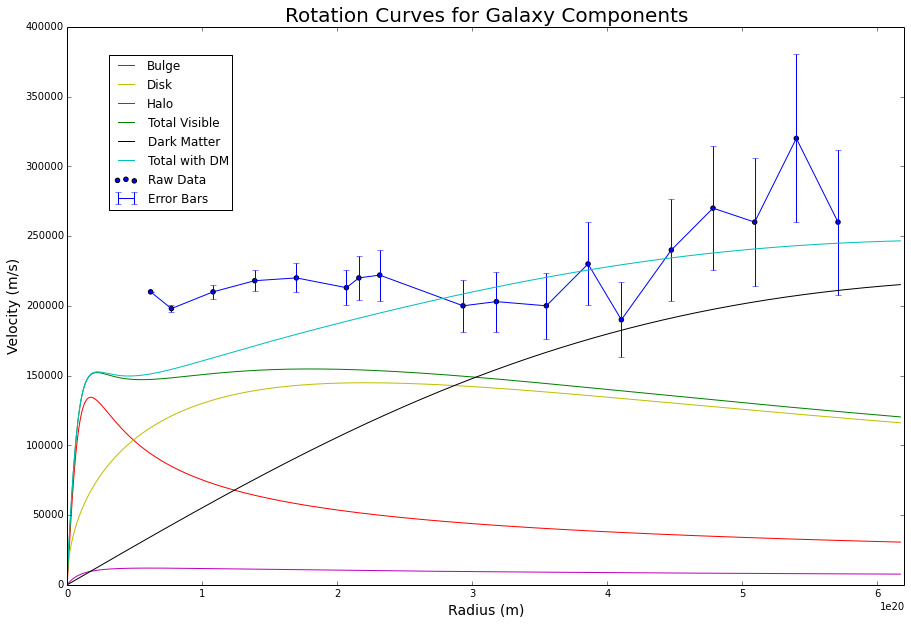

In [161]:
plt.subplots(figsize=(15,10))
plt.xlabel('Radius (m)', size = 14)
plt.ylabel('Velocity (m/s)', size = 14)
plt.title('Rotation Curves for Galaxy Components', size = 20)
plt.xlim(0,6.2e20)
plt.ylim(0,400000)

plt.scatter(R,V, label = "Raw Data")
plt.errorbar(R, V, yerr = Verror, label = "Error Bars")
plt.plot(rB,VBulge,'r',label = "Bulge")
plt.plot(rD,VDisk,'y', label = "Disk")
plt.plot(rH,VHalo,'m', label = "Halo")
plt.plot(rt,Vtotal,'g', label = "Total Visible")
plt.plot(rDM,VDarkMatter,'k', label = "Dark Matter")
plt.plot(rT,VTotal,'c', label = "Total with DM")

plt.legend(bbox_to_anchor=(0.05, 0.95), loc=2, borderaxespad=0.)
plt.show ()